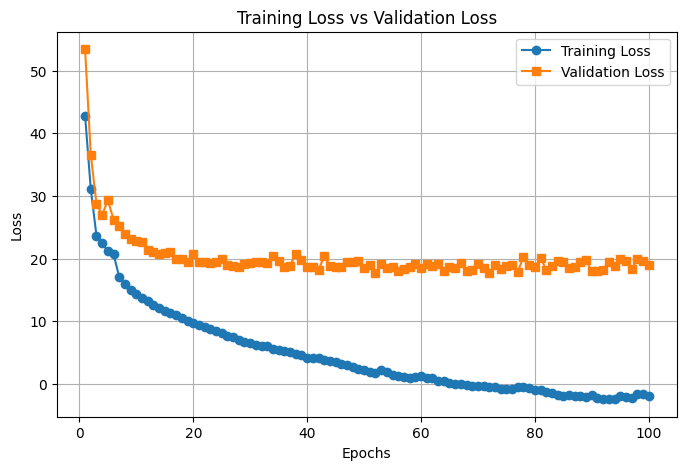

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training metrics CSV file (adjust the path if needed)
file_path = "training_metrics.csv"  # Update this if the file is in a subdirectory
df = pd.read_csv(file_path)


# Extracting necessary columns (adjust column names if they differ)
epochs = df["Epoch"]
train_loss = df["Train_Loss"]
val_loss = df["Val_Loss"]

# Plot Training Loss vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label="Training Loss", marker="o")
plt.plot(epochs, val_loss, label="Validation Loss", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


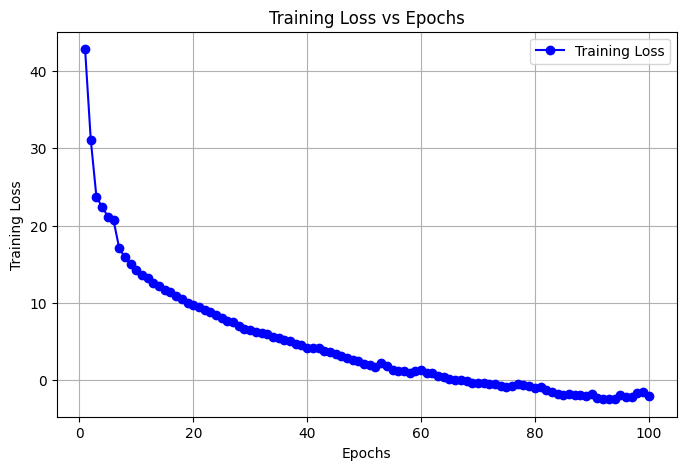

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training metrics CSV file (adjust the path if needed)
file_path = "training_metrics.csv"  # Update this if the file is in a subdirectory
df = pd.read_csv(file_path)

# Extracting necessary columns (adjust column names if they differ)
epochs = df["Epoch"]
train_loss = df["Train_Loss"]

# Plot Training Loss vs Epoch
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label="Training Loss", marker="o", color='b')
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()


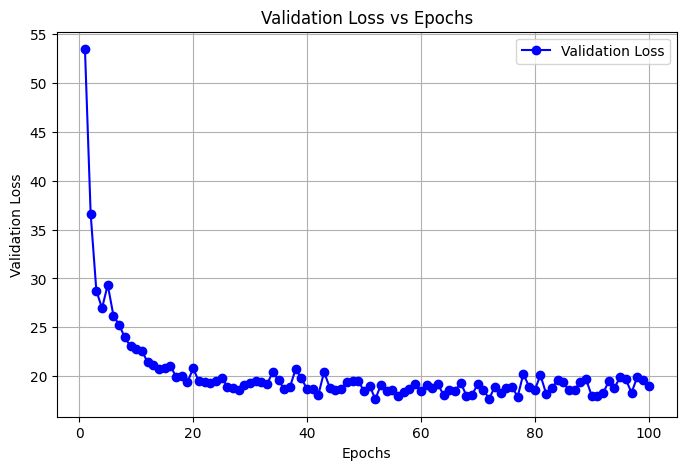

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training metrics CSV file (adjust the path if needed)
file_path = "training_metrics.csv"  # Update this if the file is in a subdirectory
df = pd.read_csv(file_path)


# Extracting necessary columns (adjust column names if they differ)
epochs = df["Epoch"]
val_loss = df["Val_Loss"]

# Plot Training Loss vs Epoch
plt.figure(figsize=(8, 5))
plt.plot(epochs, val_loss, label="Validation Loss", marker="o", color='b')
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()


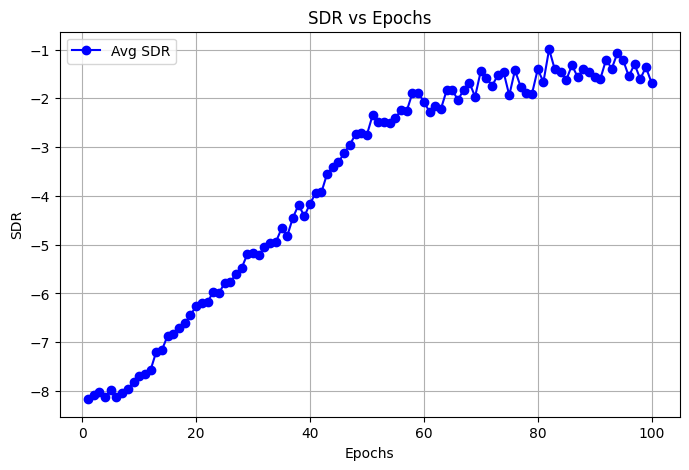

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training metrics CSV file (adjust the path if needed)
file_path = "training_metrics.csv"  # Update this if the file is in a subdirectory
df = pd.read_csv(file_path)


# Extracting necessary columns (adjust column names if they differ)
epochs = df["Epoch"]
SDR = df["Avg_SDR"]

# Plot Training Loss vs Epoch
plt.figure(figsize=(8, 5))
plt.plot(epochs, SDR, label="Avg SDR", marker="o", color='b')
plt.xlabel("Epochs")
plt.ylabel("SDR")
plt.title("SDR vs Epochs")
plt.legend()
plt.grid(True)
plt.show()


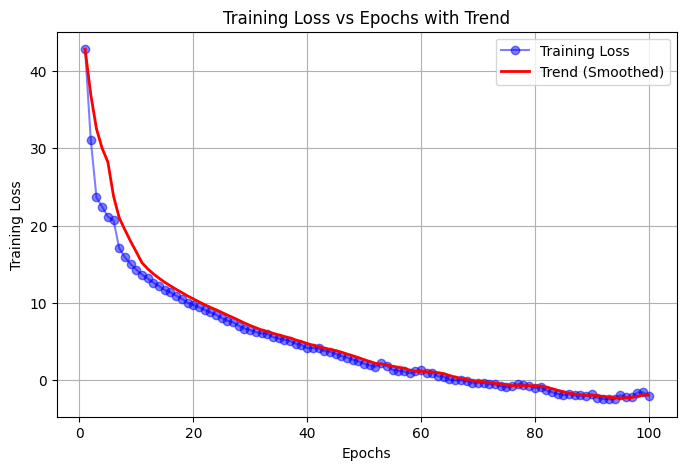

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the training metrics CSV file (adjust the path if needed)
file_path = "training_metrics.csv"  # Update this if the file is in a subdirectory
df = pd.read_csv(file_path)

# Extracting necessary columns (adjust column names if they differ)
epochs = df["Epoch"]
train_loss = df["Train_Loss"]

# Apply moving average to smooth the training loss trend
window_size = 5  # Adjust this value to control the smoothing level
train_loss_smooth = train_loss.rolling(window=window_size, min_periods=1).mean()

# Plot Training Loss vs Epoch and Trend (smoothed)
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label="Training Loss", marker="o", color='b', alpha=0.5)
plt.plot(epochs, train_loss_smooth, label="Trend (Smoothed)", color='r', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epochs with Trend")
plt.legend()
plt.grid(True)
plt.show()


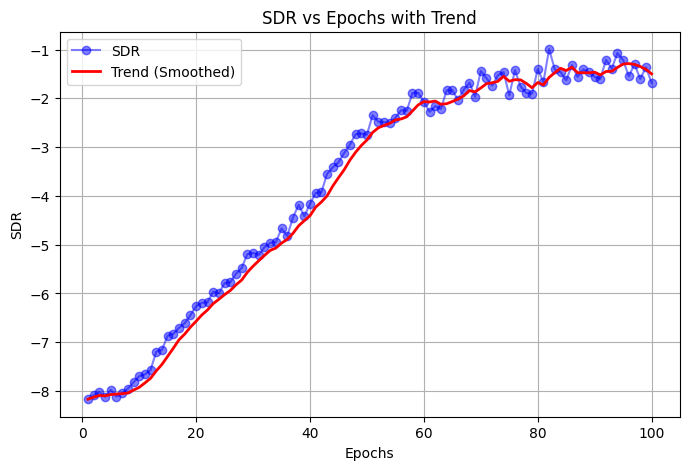

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the training metrics CSV file (adjust the path if needed)
file_path = "training_metrics.csv"  # Update this if the file is in a subdirectory
df = pd.read_csv(file_path)
# Extracting necessary columns (adjust column names if they differ)
epochs = df["Epoch"]
sdr_values = df["Avg_SDR"]  # Assuming there's a column "SDR" with the SDR values

# Apply moving average to smooth the SDR values
window_size = 5  # Adjust this value to control the smoothing level
sdr_smooth = sdr_values.rolling(window=window_size, min_periods=1).mean()

# Plot SDR vs Epoch and Trend (smoothed)
plt.figure(figsize=(8, 5))
plt.plot(epochs, sdr_values, label="SDR", marker="o", color='b', alpha=0.5)
plt.plot(epochs, sdr_smooth, label="Trend (Smoothed)", color='r', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("SDR")
plt.title("SDR vs Epochs with Trend")
plt.legend()
plt.grid(True)
plt.show()


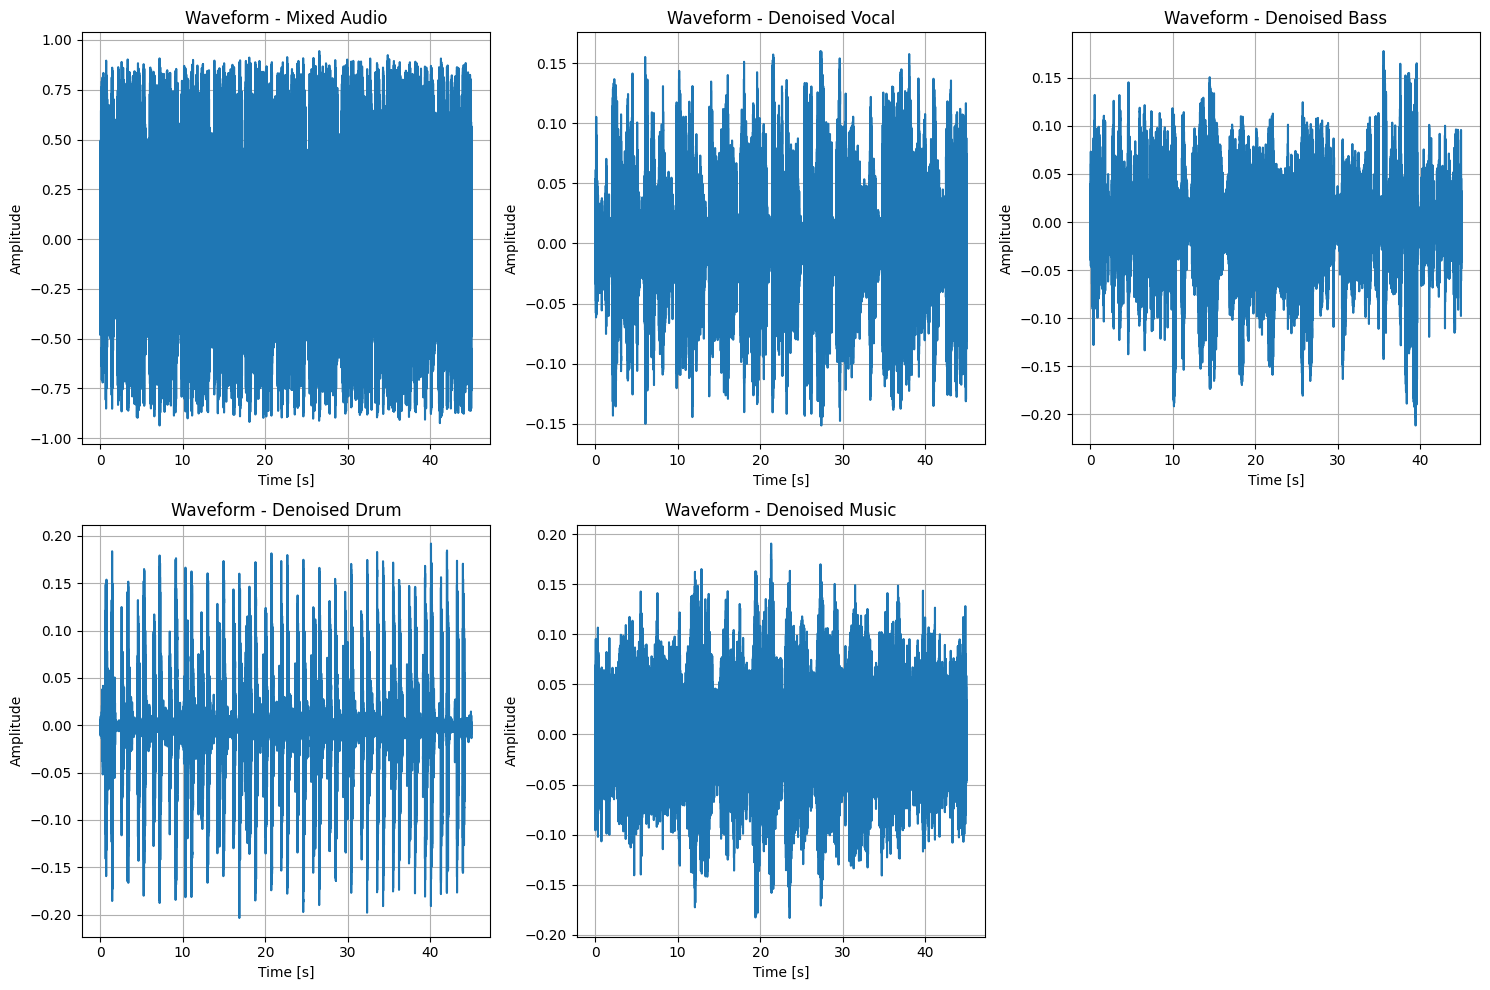

In [41]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Function to plot waveforms
def plot_waveform(audio, sr, title, ax):
    ax.plot(np.linspace(0, len(audio) / sr, num=len(audio)), audio)
    ax.set_title(title)
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Amplitude")
    ax.grid(True)

# File paths
file_paths = {
    "Mixed Audio": r"C:\Users\Mora siri\Major_demucs\static\uploads\bp02.mp3",
    "Denoised Vocal": r"C:\Users\Mora siri\Major_demucs\static\uploads\denoised_vocal.wav",
    "Denoised Bass": r"C:\Users\Mora siri\Major_demucs\static\uploads\denoised_bass.wav",
    "Denoised Drum": r"C:\Users\Mora siri\Major_demucs\static\uploads\denoised_drum.wav",
    "Denoised Music": r"C:\Users\Mora siri\Major_demucs\static\uploads\denoised_music.wav"
}

# Load audio files
audio_data = []
sampling_rates = []
for title, path in file_paths.items():
    audio, sr = librosa.load(path, sr=None)
    audio_data.append((audio, sr, title))

# Create the subplots (2 rows and 3 columns but with one hidden subplot)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot each waveform
for i, (audio, sr, title) in enumerate(audio_data):
    row, col = divmod(i, 3)  # Calculate row and column index
    plot_waveform(audio, sr, f"Waveform - {title}", axs[row, col])

# Hide the last empty subplot
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()


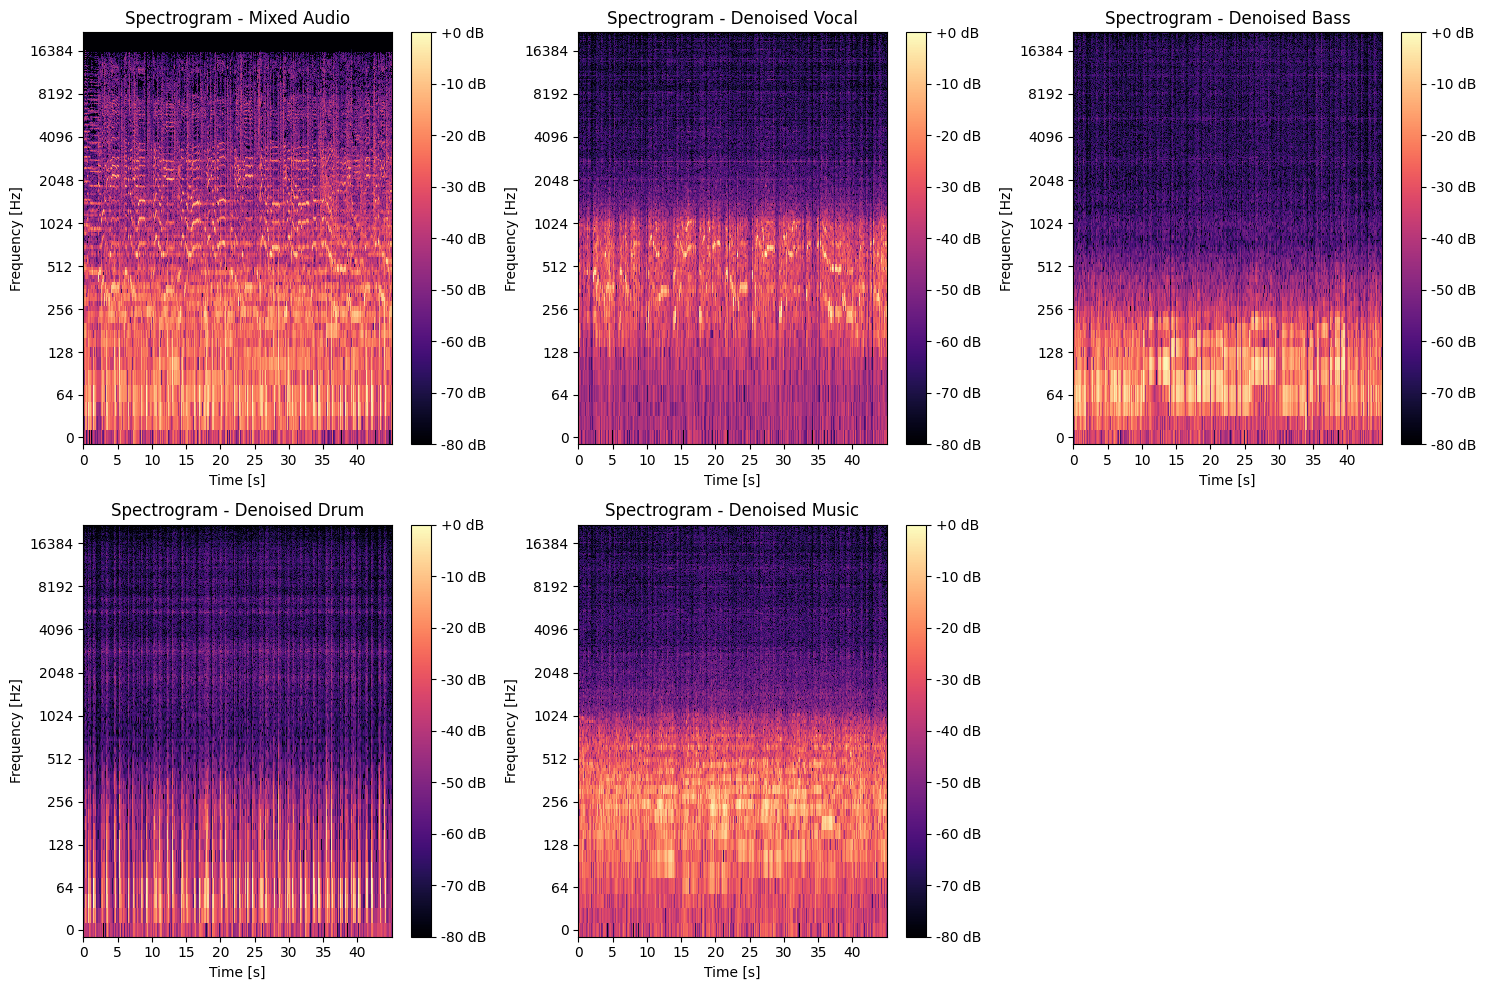

In [42]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to plot spectrograms
def plot_spectrogram(audio, sr, title, ax):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Frequency [Hz]")
    fig.colorbar(img, ax=ax, format='%+2.0f dB')  # Add colorbar

# File paths
file_paths = {
    "Mixed Audio": r"C:\Users\Mora siri\Major_demucs\static\uploads\bp02.mp3",
    "Denoised Vocal": r"C:\Users\Mora siri\Major_demucs\static\uploads\denoised_vocal.wav",
    "Denoised Bass": r"C:\Users\Mora siri\Major_demucs\static\uploads\denoised_bass.wav",
    "Denoised Drum": r"C:\Users\Mora siri\Major_demucs\static\uploads\denoised_drum.wav",
    "Denoised Music": r"C:\Users\Mora siri\Major_demucs\static\uploads\denoised_music.wav"
}

# Load audio files
audio_data = []
for title, path in file_paths.items():
    audio, sr = librosa.load(path, sr=None)
    audio_data.append((audio, sr, title))

# Create the subplots (2 rows and 3 columns but hide one subplot)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot each spectrogram
for i, (audio, sr, title) in enumerate(audio_data):
    row, col = divmod(i, 3)  # Compute row and column index
    plot_spectrogram(audio, sr, f"Spectrogram - {title}", axs[row, col])

# Hide the last empty subplot
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()
